In [7]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from classical_solvers.solver_benchmark import SolverBenchmark

In [8]:
def run_benchmark(solver):
    benchmark_results = []
    with tqdm(total=len(solver.nx_list), desc=f"Running {solver.name} Benchmark") as pbar:

        if solver.traversal_method == 'nested':
            for nx in solver.nx_list:
                for ny in solver.ny_list:
                    pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                    solver.run(nx, ny)
                    pbar.update(1)
        elif solver.traversal_method == 'zip':
            for nx, ny in zip(solver.nx_list, solver.ny_list):
                pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                solver.run(nx, ny)
                pbar.update(1)
    return benchmark_results

Running brute_force Benchmark:   0%|          | 0/6 [00:00<?, ?it/s]

Solver: simulated_annealing, Size: nx=5, ny=5: 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


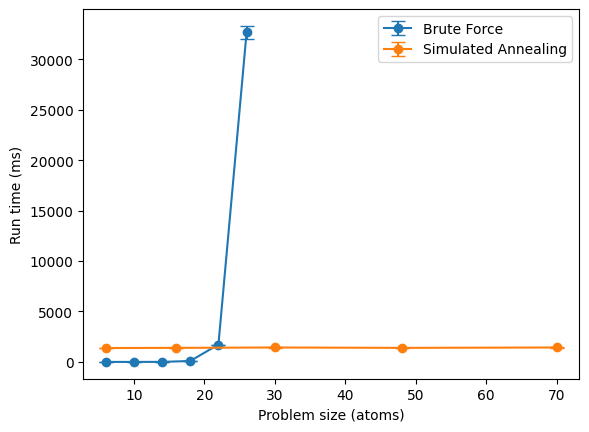

In [10]:
brute_force_config = {
    "name": "brute_force",
    "executable": "./brute_force/brute_force",
    "nx_list": [1, 2, 3, 4, 5, 6],
    "ny_list": [1, 1, 1, 1, 1, 1],
    # "nx_list": [2],
    # "ny_list": [2],
    "crystals_directory": '../native_crystal_database/benchmark_crystals/brute_force/',
    "solutions_directory": './brute_force/solutions',
    "benchmark_file_path": './brute_force_benchmark_results.csv', 
    "traversal_method": 'zip'
}

simulated_annealing_config = {
    "name": "simulated_annealing",
    "executable": "./simulated_annealing/simulated_annealing",
    "nx_list": [1, 2, 3, 4, 5],
    "ny_list": [1, 2, 3, 4, 5],
    "crystals_directory": '../native_crystal_database/benchmark_crystals/simulated_annealing/',
    "solutions_directory": './simulated_annealing/solutions',
    "benchmark_file_path": './simulated_annealing_benchmark_results.csv', 
    "repetitions": 100,
    "iterations": 1e4, 
    "traversal_method": 'zip'
}

brute_force_solver = SolverBenchmark(**brute_force_config)
simulated_annealing_solver = SolverBenchmark(**simulated_annealing_config)

brute_force_solver.generate_problems()
simulated_annealing_solver.generate_problems()

for solver in [brute_force_solver, simulated_annealing_solver]:
    run_benchmark(solver)

df_brute_force = pd.read_csv(brute_force_config['benchmark_file_path'])
stats_df_brute_force = df_brute_force.groupby(['solver', 'problem_size'])['runtime'].agg(['mean', 'std']).reset_index()

df_simulated_annealing = pd.read_csv(simulated_annealing_config['benchmark_file_path'])
stats_df_simulated_annealing = df_simulated_annealing.groupby(['solver', 'problem_size'])['runtime'].agg(['mean', 'std']).reset_index()

fig, ax = plt.subplots()
ax.errorbar(stats_df_brute_force['problem_size'], stats_df_brute_force['mean'], yerr=stats_df_brute_force['std'], label='Brute Force', fmt='-o', capsize=5)
ax.errorbar(stats_df_simulated_annealing['problem_size'], stats_df_simulated_annealing['mean'], yerr=stats_df_simulated_annealing['std'], label='Simulated Annealing', fmt='-o', capsize=5)

ax.set_xlabel('Problem size (atoms)')
ax.set_ylabel('Run time (ms)')
ax.legend()
plt.show()

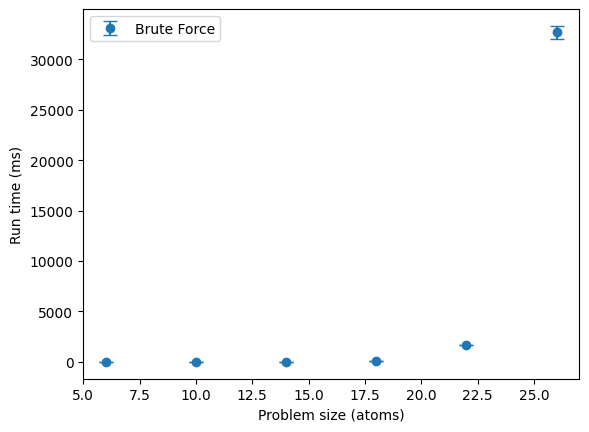

In [22]:
df_brute_force = pd.read_csv(brute_force_config['benchmark_file_path'])
stats_df_brute_force = df_brute_force.groupby(['solver', 'problem_size'])['runtime'].agg(['mean', 'std']).reset_index()


fig, ax = plt.subplots()
ax.errorbar(stats_df_brute_force['problem_size'], stats_df_brute_force['mean'], yerr=stats_df_brute_force['std'], label='Brute Force', fmt='o', capsize=5)
ax.set_xlabel('Problem size (atoms)')
ax.set_ylabel('Run time (ms)')
ax.legend()
plt.show()

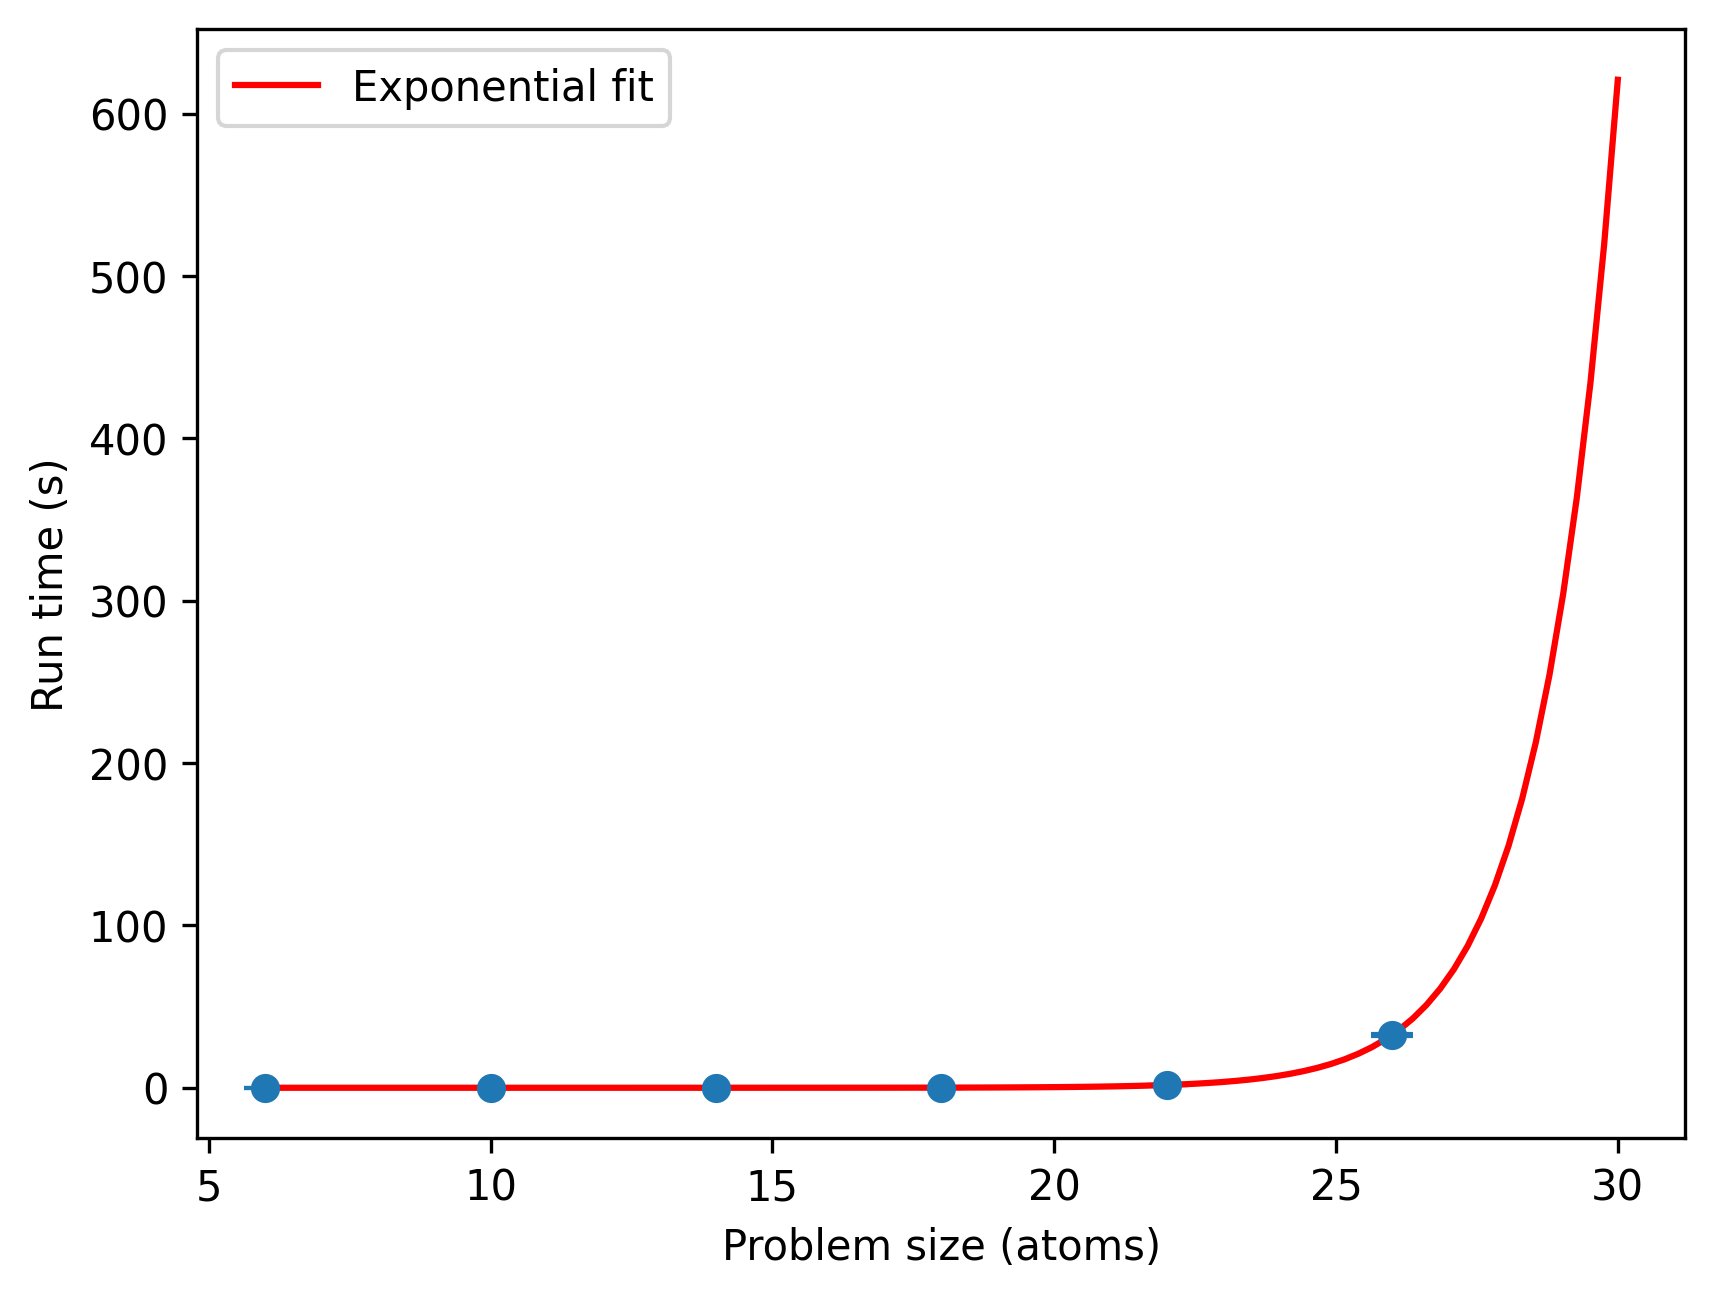

y = 0.00015955 * exp(0.73607291 * x)


In [43]:
import numpy as np
from scipy.optimize import curve_fit

# Define the form of the function you want to fit
def func(x, a, b):
    return a * np.exp(b * x)

# Fit the function to the data
popt, pcov = curve_fit(func, stats_df_brute_force['problem_size'], stats_df_brute_force['mean'])

# Generate y-data for the fitted function
ydata_fit = np.linspace(stats_df_brute_force['problem_size'][0], 30, 100)
fit_ys = func(ydata_fit, *popt)

fig, ax = plt.subplots(dpi=300)
ax.errorbar(stats_df_brute_force['problem_size'], stats_df_brute_force['mean'] / 1e3, yerr=stats_df_brute_force['std'] / 1e3, fmt='o', capsize=5)
ax.plot(ydata_fit, fit_ys / 1e3, 'r-', label='Exponential fit')

ax.set_xlabel('Problem size (atoms)')
ax.set_ylabel('Run time (s)')
ax.legend()
plt.show()
# print fit function
print(f"y = {popt[0]:.8f} * exp({popt[1]:.8f} * x)")

Text(0, 0.5, 'Run time (s)')

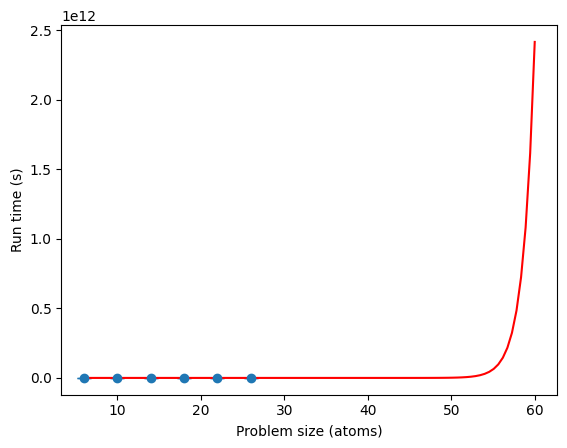

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the form of the function you want to fit
def func(x, a, b):
    return a * np.exp(b * x)

# Fit the function to the data
popt, pcov = curve_fit(func, stats_df_brute_force['problem_size'], stats_df_brute_force['mean'])

# Generate y-data for the fitted function
ydata_fit = np.linspace(stats_df_brute_force['problem_size'][0], 60, 100)
fit_ys = func(ydata_fit, *popt)

fig, ax = plt.subplots()
ax.errorbar(stats_df_brute_force['problem_size'], stats_df_brute_force['mean'] / 1e3, yerr=stats_df_brute_force['std'] / 1e3, fmt='o', capsize=5)
ax.plot(ydata_fit, fit_ys / 1e3, 'r-', label='Exponential fit')

ax.set_xlabel('Problem size (atoms)')
ax.set_ylabel('Run time (s)')

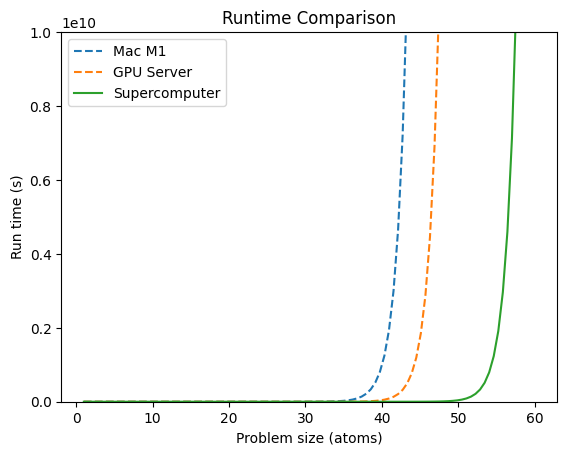

In [69]:
def local_runtime(x):
    return 0.00015955 * np.exp(0.73607291 * x)

# Now we assume that the basic GPU server has 3 GPUs and the supercomputer has 4584 GPUs.
# We will also assume an efficiency of parallelization. This is often less than 1 due to
# overhead and diminishing returns on added processors. We'll use a common efficiency factor of 0.75.

# Calculate the theoretical speedup for the GPU server
# Assume each GPU provides a conservative estimate of a 10x speedup over the M1 Mac
gpu_server_speedup = 3 * 10 * 0.75

# Calculate the theoretical speedup for the supercomputer
# Assume each GPU provides a 10x speedup and each CPU provides a 1x speedup over the M1 Mac
supercomputer_speedup = (4584 * 10 + 4584 * 1) * 0.75

# Calculate the new runtime expressions by dividing the local runtime by the speedup
def gpu_server_runtime(x):
    return local_runtime(x) / gpu_server_speedup

def supercomputer_runtime(x):
    return local_runtime(x) / supercomputer_speedup

# Create a range of problem sizes (atoms)
problem_sizes = np.linspace(1, 60, 100)

# Calculate the runtimes for the GPU server and supercomputer
gpu_server_runtimes = [gpu_server_runtime(size) for size in problem_sizes]
supercomputer_runtimes = [supercomputer_runtime(size) for size in problem_sizes]

plt.figure()
plt.plot(problem_sizes, local_runtime(problem_sizes), label='Mac M1', linestyle='--')
plt.plot(problem_sizes, gpu_server_runtimes, label='GPU Server', linestyle='--')
plt.plot(problem_sizes, supercomputer_runtimes, label='Supercomputer', linestyle='-')
plt.xlabel('Problem size (atoms)')
plt.ylabel('Run time (s)')
plt.ylim(0, 1e10)


plt.legend()

plt.title('Runtime Comparison')
plt.show()

In [68]:
convert_to_days = lambda x: x / 60 / 60 / 24
print(f"GPU Server Runtime: {convert_to_days(supercomputer_runtime(60)):.2f} days")

GPU Server Runtime: 739654.14 days


In [45]:
from sympy import symbols, exp

# Define the variables
x = symbols('x')
local_runtime_expr = 0.00015955 * exp(0.73607291 * x)

# Now we assume that the basic GPU server has 3 GPUs and the supercomputer has 4584 GPUs.
# We will also assume an efficiency of parallelization. This is often less than 1 due to
# overhead and diminishing returns on added processors. We'll use a common efficiency factor of 0.75.

# Calculate the theoretical speedup for the GPU server
# Assume each GPU provides a conservative estimate of a 10x speedup over the M1 Mac
gpu_server_speedup = 3 * 10 * 0.75

# Calculate the theoretical speedup for the supercomputer
# Assume each GPU provides a 10x speedup and each CPU provides a 1x speedup over the M1 Mac
supercomputer_speedup = (4584 * 10 + 4584 * 1) * 0.75

# Calculate the new runtime expressions by dividing the local runtime expression by the speedup
gpu_server_runtime_expr = local_runtime_expr / gpu_server_speedup
supercomputer_runtime_expr = local_runtime_expr / supercomputer_speedup

gpu_server_runtime_expr, supercomputer_runtime_expr


ModuleNotFoundError: No module named 'sympy'